In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
pwd  # Mevcut dosya lokasyonumuz / Our current location

'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2'

In [3]:
# Öncelikle ham verileri (786M ZIP arşivi)'ni indirelim:

In [70]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

^C


In [4]:
pwd

'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2'

In [7]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 846B-40FA

 Directory of C:\Users\44778\Desktop\AI Summer Camp\Proje 2

13/08/2022  21:45    <DIR>          .
13/08/2022  21:45    <DIR>          ..
13/08/2022  21:40    <DIR>          .ipynb_checkpoints
13/08/2022  17:18    <DIR>          Cat
13/08/2022  17:32           299,812 cat-dog-classifier-using-vgg16-transfer-learning.ipynb
13/08/2022  17:32            24,876 CDLA-Permissive-2.0.pdf
13/08/2022  17:03    <DIR>          CNN Project Image Classification
13/08/2022  17:56           136,071 confirmation.aspx_id=54765
13/08/2022  21:23           950,412 DL-S8 (Image Classification with CNN-catdogclassifier)-colab.ipynb
13/08/2022  17:19    <DIR>          Dog
13/08/2022  17:59       824,887,076 kagglecatsanddogs_5340.zip
13/08/2022  21:25    <DIR>          PetImages
13/08/2022  21:31    <DIR>          PetImages2
13/08/2022  17:32               104 readme[1].txt
13/08/2022  15:47           215,578 transfer_learning_project.pdf
13/08/

In [5]:
import os 

In [8]:
os.chdir("PetImages")

In [9]:
pwd

'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages'

In [10]:
my_data_dir = 'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages'

In [11]:
os.listdir(my_data_dir)

['Cat', 'Dog']

In [80]:
# num_skipped = 0
# for folder_name in ("Cat", "Dog"):
#     folder_path = os.path.join("PetImages", folder_name)
#     for fname in os.listdir(folder_path):
#         fpath = os.path.join(folder_path, fname)
#         try:
#             fobj = open(fpath, "rb")
#             is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
#         finally:
#             fobj.close()

#         if not is_jfif:
#             num_skipped += 1
#             # Delete corrupted image
#             os.remove(fpath)

# print("Deleted %d images" % num_skipped)

In [81]:
# for folder_name in ("Cat", "Dog"):
#     folder_path = os.path.join("PetImages", folder_name)
#     for fname in os.listdir(folder_path):
#         fpath = os.path.join(folder_path, fname)
# return fpath

## Görüntü Manipülasyonu

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
image_gen = ImageDataGenerator(rotation_range=20,       # Resmi 20 derece döndürür / rotate the image 20 degrees
                               width_shift_range=0.10,  # Resim eninin maksimum %5 kaydırır / Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Resim boyunu maksimum %5 kaydırır / Shift the pic height by a max of 5%
                               rescale=1/255,           # Resmi normalleştirerek yeniden ölçeklendirir / Rescale the image by normalzing it.
                               shear_range=0.1,         # Görüntünün bir kısmını keser max 0.1 / Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1,          # Maksimum %10 yakınlaştır / Zoom in by 10% max
                               horizontal_flip=True,    # Yatay çevirir / Allow horizontal flipping
                               fill_mode='nearest'      # Eksik pikselleri en yakındaki ile doldurur / Fill in missing pixels with the nearest filled value
                              )

In [14]:
pwd

'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages'

In [15]:
my_data_dir

'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages'

In [16]:
os.listdir(my_data_dir + '\Cat')[0]

'0.jpg'

In [17]:
os.listdir(my_data_dir + '\Dog')[0]

'0.jpg'

In [18]:
cat_image_path = my_data_dir + '/Cat' + '/0.jpg'
dog_image_path = my_data_dir + '/Dog' + '/0.jpg'

In [19]:
cat_img=imread(cat_image_path)
dog_img=imread(dog_image_path)

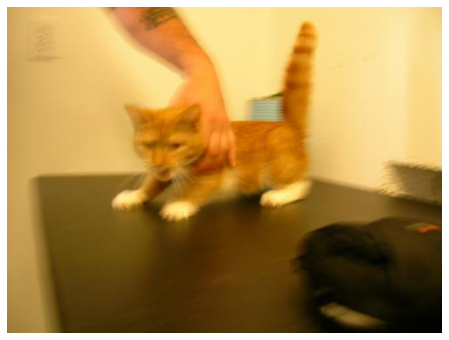

In [20]:
plt.imshow(cat_img)
plt.axis('off');

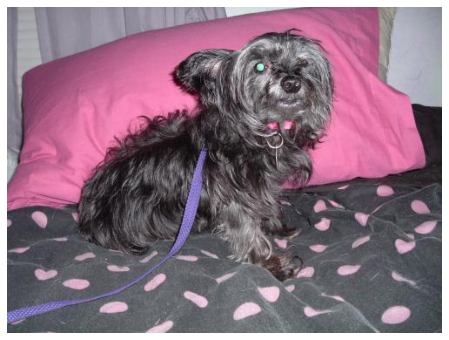

In [21]:
plt.imshow(dog_img)
plt.axis('off');

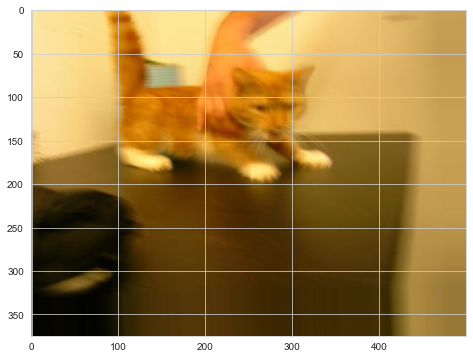

In [22]:
plt.imshow(image_gen.random_transform(cat_img));

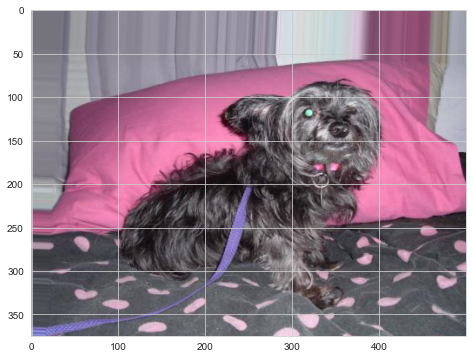

In [23]:
plt.imshow(image_gen.random_transform(dog_img));

## Veri Setlerini Oluşturalım

In [24]:
#!pip install split-folders

In [25]:
import splitfolders

In [26]:
pwd

'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages'

In [102]:
input_folder = 'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages'
output_folder = 'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages2'

In [103]:
# SpLit with a ratio.
# To onLy spLit into training and vaLidation set, set a tupLe to ‘ratio‘, i.e,
# Train, vaL, test
# If you don't want to use ratio, I mean if you want to split with fixed number of images:
# use "fixed" instead of "ratio"
splitfolders.ratio(input_folder, output= output_folder, seed = 42, ratio = (.7, .2, .1), group_prefix = None)

Copying files: 25002 files [02:48, 148.61 files/s]


In [28]:
my_data_dir = 'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages2'
my_data_dir

'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages2'

In [29]:
val_path = my_data_dir + '\\val\\'
train_path = my_data_dir + '\\train\\'
test_path = my_data_dir + '\\test\\'

In [30]:
os.listdir(my_data_dir)

['test', 'train', 'val']

In [31]:
# Train
len(os.listdir(my_data_dir + '\\train' + '\\Cat')), len(os.listdir(my_data_dir+ '\\train' + '\\Dog'))

(8750, 8750)

In [32]:
# Test
len(os.listdir(my_data_dir+ '\\test'+'\\Cat')), len(os.listdir(my_data_dir+ '\\test'+'\\Dog'))

(1251, 1251)

In [33]:
# Val
len(os.listdir(my_data_dir+ '\\val'+'\\Cat')), len(os.listdir(my_data_dir+ '\\val'+'\\Dog'))

(2500, 2500)

## Bir klasörden çok sayıda manipüle edilmiş görüntü oluşturma

In [34]:
image_gen

In [35]:
image_gen.flow_from_directory(train_path)

Found 17498 images belonging to 2 classes.


In [36]:
image_gen.flow_from_directory(val_path)

Found 5000 images belonging to 2 classes.


In [37]:
image_gen.flow_from_directory(test_path)

Found 2502 images belonging to 2 classes.
